In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,roc_auc_score, accuracy_score ,roc_curve, auc
from sklearn.svm import SVR,SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPRegressor,MLPClassifier
from scipy import interp
%matplotlib inline

# Importing the data file

The processed data file has been loaded 

In [2]:
User_Frequecy_File_Finale = "User Frequecy File_Finale.csv"
df = pd.read_csv(User_Frequecy_File_Finale , sep = ',')
df.head()

,Filename,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,...,work,worship,writing,youth,zest,Unnamed: 195,C,M,E,VE
0,0utoftime.txt,0.002767,0.001277,0.000851,0.001703,0.002235,0.000638,0.000160,0.001969,0.000106,...,0.004522,0.000160,0.004629,0.002181,0.000213,NaN,40.000001,56.000000,4.000000,0.000000
1,1LX.txt,0.002424,0.000756,0.000252,0.001480,0.000567,0.000661,0.000126,0.000787,0.000157,...,0.002235,0.000157,0.001732,0.001007,0.000063,NaN,22.330096,59.708738,16.990291,0.970874
2,4chewnahdoe.txt,0.002351,0.001443,0.001052,0.001175,0.000887,0.000969,0.000392,0.001196,0.000371,...,0.005093,0.000701,0.003980,0.001815,0.000330,NaN,60.975611,36.585367,2.439024,0.000000
3,4sqOvershare.txt,0.004184,0.004707,0.000523,0.001270,0.002540,0.000075,0.000224,0.000448,0.000000,...,0.004109,0.000075,0.002540,0.002690,0.000299,NaN,17.073171,46.341464,34.146342,2.439024
4,909kishore.txt,0.002706,0.001503,0.000376,0.000676,0.000676,0.000752,0.000301,0.000376,0.000150,...,0.003683,0.000150,0.002781,0.001052,0.000000,NaN,16.666667,66.666669,16.666667,0.000000


---

# Preprocessing the Data:

Dropping the columns 'Filename','Unnamed: 195' since they are useless for our analysis

In [3]:
df.drop(['Filename','Unnamed: 195'],axis=1,inplace=True)
df.head()

,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,anticipation,...,white_collar_job,work,worship,writing,youth,zest,C,M,E,VE
0,0.002767,0.001277,0.000851,0.001703,0.002235,0.000638,0.000160,0.001969,0.000106,0.000266,...,0.001117,0.004522,0.000160,0.004629,0.002181,0.000213,40.000001,56.000000,4.000000,0.000000
1,0.002424,0.000756,0.000252,0.001480,0.000567,0.000661,0.000126,0.000787,0.000157,0.000031,...,0.000630,0.002235,0.000157,0.001732,0.001007,0.000063,22.330096,59.708738,16.990291,0.970874
2,0.002351,0.001443,0.001052,0.001175,0.000887,0.000969,0.000392,0.001196,0.000371,0.000206,...,0.001712,0.005093,0.000701,0.003980,0.001815,0.000330,60.975611,36.585367,2.439024,0.000000
3,0.004184,0.004707,0.000523,0.001270,0.002540,0.000075,0.000224,0.000448,0.000000,0.000000,...,0.001121,0.004109,0.000075,0.002540,0.002690,0.000299,17.073171,46.341464,34.146342,2.439024
4,0.002706,0.001503,0.000376,0.000676,0.000676,0.000752,0.000301,0.000376,0.000150,0.000150,...,0.000301,0.003683,0.000150,0.002781,0.001052,0.000000,16.666667,66.666669,16.666667,0.000000


In [102]:
df.shape

(671, 198)

## Checking for missing values:

In [103]:
df.isnull().sum().sum()

0

In [104]:
df.isnull().sum()

achievement         0
affection           0
aggression          0
air_travel          0
alcohol             0
ancient             0
anger               0
animal              0
anonymity           0
anticipation        0
appearance          0
art                 0
attractive          0
banking             0
beach               0
beauty              0
blue_collar_job     0
body                0
breaking            0
business            0
car                 0
celebration         0
cheerfulness        0
childish            0
children            0
cleaning            0
clothing            0
cold                0
college             0
communication       0
                   ..
tool                0
torment             0
tourism             0
toy                 0
traveling           0
trust               0
ugliness            0
urban               0
vacation            0
valuable            0
vehicle             0
violence            0
war                 0
warmth              0
water     

In [7]:
df[['C']].describe()

,C
count,671.000000
mean,32.591827
std,21.904598
min,0.000000
25%,17.647059
50%,29.032257
75%,43.685292
max,100.000000


In [8]:
df[['M']].describe()

,M
count,671.000000
mean,50.122382
std,20.125056
min,0.000000
25%,39.685743
50%,50.980395
75%,60.737813
max,100.000000


In [9]:
df[['E']].describe()

,E
count,671.000000
mean,14.263088
std,15.325326
min,0.000000
25%,3.225806
50%,10.638298
75%,20.000000
max,100.000000


In [10]:
df[['VE']].describe()

,VE
count,671.000000
mean,3.022703
std,6.682070
min,0.000000
25%,0.000000
50%,0.332226
75%,3.785527
max,100.000000


## Creating Classes:

In [4]:
MA_C=[]
MA_M=[]
MA_E=[]
MA_VE=[]
for i in range(df.shape[0]):
    if df[['C']].iloc[i].values > df[['C']].mean().values: MA_C.append(1)
    else:MA_C.append(0)
    if df[['M']].iloc[i].values > df[['M']].mean().values: MA_M.append(1)
    else:MA_M.append(0)
    if df[['E']].iloc[i].values > df[['E']].mean().values: MA_E.append(1)
    else:MA_E.append(0)
    if df[['VE']].iloc[i].values > df[['VE']].mean().values: MA_VE.append(1)
    else:MA_VE.append(0)
MA_C=pd.DataFrame(data=MA_C, columns=['MA_C'])
MA_M=pd.DataFrame(data=MA_M, columns=['MA_M'])
MA_E=pd.DataFrame(data=MA_E, columns=['MA_E'])
MA_VE=pd.DataFrame(data=MA_VE, columns=['MA_VE'])

In [5]:
df=pd.concat([df,MA_C,MA_M,MA_E,MA_VE], axis=1)

In [6]:
df.head()

,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,anticipation,...,youth,zest,C,M,E,VE,MA_C,MA_M,MA_E,MA_VE
0,0.002767,0.001277,0.000851,0.001703,0.002235,0.000638,0.000160,0.001969,0.000106,0.000266,...,0.002181,0.000213,40.000001,56.000000,4.000000,0.000000,1,1,0,0
1,0.002424,0.000756,0.000252,0.001480,0.000567,0.000661,0.000126,0.000787,0.000157,0.000031,...,0.001007,0.000063,22.330096,59.708738,16.990291,0.970874,0,1,1,0
2,0.002351,0.001443,0.001052,0.001175,0.000887,0.000969,0.000392,0.001196,0.000371,0.000206,...,0.001815,0.000330,60.975611,36.585367,2.439024,0.000000,1,0,0,0
3,0.004184,0.004707,0.000523,0.001270,0.002540,0.000075,0.000224,0.000448,0.000000,0.000000,...,0.002690,0.000299,17.073171,46.341464,34.146342,2.439024,0,0,1,0
4,0.002706,0.001503,0.000376,0.000676,0.000676,0.000752,0.000301,0.000376,0.000150,0.000150,...,0.001052,0.000000,16.666667,66.666669,16.666667,0.000000,0,1,1,0


## Checking and dealing with outliers:


To find outliers the Tukey oultier labeling is applied. If a value lies below the first quartile or above the third quartile by more than 1.5 times the interquartile range (IQR), it will be considered an outlier.
Next, outliers will be capped to the to either the first quartile-1.5 * IQR or the third quartile+1.5 * IQR (since the outliers here are legitimate values not an error value, therefore replacing them with mean or dropping them is not preferred). 

In [6]:
up_o=[]
low_o=[]
x=df.describe()
IQR=x.values[6,:]-x.values[4,:] #Interquartile range of each feature
upper_limit=x.values[6,:]+1.5*IQR
lower_limit=x.values[4,:]-1.5*IQR
for i in range(70):
    upper_outlier=( (df.iloc[:,i] > upper_limit[i]))
    lower_outlier=( (df.iloc[:,i] < lower_limit[i]))
    df.iloc[:,i].loc[upper_outlier]=upper_limit[i]
    df.iloc[:,i].loc[lower_outlier]=lower_limit[i]
    up_o.append(upper_outlier)
    low_o.append(lower_outlier)
#     outlier=( (df.iloc[:,i] < lower_limit[i]) | (df.iloc[:,i] > upper_limit[i]))
#     df.iloc[:,i].loc[outlier]=np.nan

C:\Users\m94o\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
low_outdf=pd.DataFrame(low_o)
up_outdf=pd.DataFrame(up_o)
print('Total percentage of found outliers: ',(low_outdf[low_outdf==True].sum().sum()+up_outdf[up_outdf==True].sum().sum())*100/(df.shape[0]*df.shape[1]))

Total percentage of found outliers:  1.0926502486314205


---

In [7]:
X_train, X_test= train_test_split(df, test_size=0.25,random_state=101)
X_train=pd.DataFrame(data=X_train.values, index=range (X_train.shape[0]), columns= X_train.columns)
X_test=pd.DataFrame(data=X_test.values, index=range (X_test.shape[0]), columns= X_test.columns)

## Normalizing the Data
Normalizing the data using z-score normalization, except for the target data since it is a percentage data of each user. 

In [8]:
scaler = StandardScaler()

scaled_features=scaler.fit_transform(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis=1))
col=X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis=1).columns
scaled_features= pd.DataFrame(data=scaled_features, columns=col)
X_train_target=X_train[['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE']]
X_train=pd.concat([scaled_features,X_train_target], axis=1)


scaled_test=scaler.transform(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis=1))
scaled_test=pd.DataFrame(data=scaled_test, columns=col)
X_test_target=X_test[['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE']]
X_test=pd.concat([scaled_test,X_test_target], axis=1)

In [11]:
df.shape[1]-8

194

# Features Selection:
Feature ranking is performed here using mutual information between the features and the targets.
After that the top 10 features will be used in building our models

In [9]:
slc_targ_features=[]
features_score=[0] * 194
for targ in ['C', 'M', 'E', 'VE']:
    features_select=SelectKBest(mutual_info_regression, k=1)
    features_select.fit(df.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis=1), df[[targ]].values.ravel())
    ind=np.argpartition(features_select.scores_, -20)[-20:]
    
    slc_targ_features.append([targ,df.iloc[:,np.argpartition(features_select.scores_, -20)[-20:]].columns])
    print("The top 3 features for target '", targ, "' are ",df.iloc[:,np.argpartition(features_select.scores_, -3)[-3:]].columns)
    print ('The score of the top 3 features: ', features_select.scores_[np.argpartition(features_select.scores_, -3)[-3:]])
    features_score=features_score+features_select.scores_

The top 3 features for target ' C ' are  Index(['swimming', 'achievement', 'air_travel'], dtype='object')
The score of the top 3 features:  [0.08685651 0.08882391 0.13310566]
The top 3 features for target ' M ' are  Index(['family', 'alcohol', 'office'], dtype='object')
The score of the top 3 features:  [0.08261506 0.08398883 0.09479989]
The top 3 features for target ' E ' are  Index(['beauty', 'philosophy', 'toy'], dtype='object')
The score of the top 3 features:  [0.07810984 0.08635247 0.07908785]
The top 3 features for target ' VE ' are  Index(['meeting', 'affection', 'cheerfulness'], dtype='object')
The score of the top 3 features:  [0.07391608 0.08116539 0.08326756]


In [10]:
fslc_targ={'C':slc_targ_features[0][1], 'M':slc_targ_features[1][1],'E':slc_targ_features[2][1], 'VE': slc_targ_features[3][1]}


In [14]:
slc_columns=np.unique(np.concatenate([fslc_targ['C'],fslc_targ['M']
                             ,fslc_targ['E'],fslc_targ['VE']
                            ,['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE']]))
print(slc_columns)
print(slc_columns.shape)

['C' 'E' 'M' 'MA_C' 'MA_E' 'MA_M' 'MA_VE' 'VE' 'achievement' 'affection'
 'aggression' 'air_travel' 'alcohol' 'anger' 'anticipation' 'art' 'beauty'
 'body' 'car' 'celebration' 'cheerfulness' 'confusion' 'death'
 'disappointment' 'disgust' 'dominant_personality' 'driving' 'eating'
 'exercise' 'fabric' 'family' 'fear' 'fire' 'gain' 'giving' 'heroic'
 'hiking' 'home' 'horror' 'hygiene' 'law' 'legend' 'masculine'
 'medical_emergency' 'meeting' 'military' 'music' 'neglect' 'nervousness'
 'occupation' 'office' 'optimism' 'pain' 'payment' 'philosophy' 'politics'
 'poor' 'power' 'programming' 'rage' 'religion' 'restaurant' 'sadness'
 'sexual' 'shopping' 'strength' 'swimming' 'technology' 'timidity' 'tool'
 'tourism' 'toy' 'trust' 'vehicle' 'violence' 'weakness' 'weather' 'work']
(78,)


The top 10 features will be used
Splitting the data into train and test data. The test data size chosen to be 30%.

In [209]:
fslc_targ['C']

Index(['technology', 'trust', 'giving', 'neglect', 'vehicle', 'nervousness',
       'music', 'celebration', 'car', 'weakness', 'programming', 'body',
       'timidity', 'art', 'law', 'swimming', 'exercise', 'air_travel',
       'aggression', 'achievement'],
      dtype='object')

# Building the Prediction Algorithms:

## KNN Regression

In [148]:
mod=['C','M','E','VE']
for i in range(4):
    knn = KNeighborsRegressor()
    knn.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),X_train[[mod[i]]])

    print(mod[i])
    print('training score: ',knn.score(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                       X_train[[mod[i]]])*100)
    print('testing score: ',knn.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                      X_test[[mod[i]]])*100)


C
training score:  32.14114949674024
testing score:  -3.418326642664682
M
training score:  24.80568530327165
testing score:  -13.440644622069286
E
training score:  30.049192067095788
testing score:  -15.869754033083105
VE
training score:  24.72390400251668
testing score:  -29.222958716139622


With feature selection:

In [211]:
mod=['C','M','E','VE']
for i in range(4):
    knn = KNeighborsRegressor()
    knn.fit(X_train[fslc_targ[mod[i]]],X_train[[mod[i]]])

    print(mod[i])
    print('training score: ',knn.score(X_train[fslc_targ[mod[i]]],
                                       X_train[[mod[i]]])*100)
    print('testing score: ',knn.score(X_test[fslc_targ[mod[i]]],
                                      X_test[[mod[i]]])*100)


C
training score:  29.767872713802102
testing score:  4.640953439385676
M
training score:  18.695901086806746
testing score:  -11.653478731718536
E
training score:  28.234143717593664
testing score:  -11.392115967783866
VE
training score:  20.58853436944067
testing score:  -31.169574005541456


Evaluating and tunning the model to find the best parameters for our 4 knn regression models (one regression model for each resturant class) 

In [258]:
obrained_parameters=[]
for cls in ['C','M','E','VE']:
    
    knn = neighbors.KNeighborsRegressor()
    parameters={'n_neighbors':np.arange(30)+1, 'weights':['distance','uniform']}
    clf=GridSearchCV(knn,parameters,cv=10,iid=False)
    clf.fit(X_train[fslc_targ[cls]],X_train[[cls]])
    obrained_parameters.append(clf.best_params_)
    print(clf.best_params_)

{'n_neighbors': 27, 'weights': 'distance'}
{'n_neighbors': 29, 'weights': 'uniform'}
{'n_neighbors': 23, 'weights': 'distance'}
{'n_neighbors': 30, 'weights': 'distance'}


In [259]:
obrained_parameters[0]['n_neighbors']

27

Evaluating the performance of the models

In [260]:
mod=pd.DataFrame(data= [['C',obrained_parameters[0]['n_neighbors'],obrained_parameters[0]['weights']],
                        ['M',obrained_parameters[1]['n_neighbors'],obrained_parameters[1]['weights']],
                        ['E',obrained_parameters[2]['n_neighbors'],obrained_parameters[2]['weights']],
                        ['VE',obrained_parameters[3]['n_neighbors'],obrained_parameters[3]['weights']]])
for i in range(4):
    knn = KNeighborsRegressor(n_neighbors=mod.iloc[i,1], weights=mod.iloc[i,2])
    knn.fit(X_train[fslc_targ[mod.iloc[i,0]]],X_train[[mod.iloc[i,0]]])

    print(mod.iloc[i,0])
    print('training score: ',knn.score(X_train[fslc_targ[mod.iloc[i,0]]],X_train[[mod.iloc[i,0]]])*100)
    print('testing score: ',knn.score(X_test[fslc_targ[mod.iloc[i,0]]],X_test[[mod.iloc[i,0]]])*100)

C
training score:  100.0
testing score:  5.5452174795223454
M
training score:  3.3210790059340245
testing score:  -2.1354745873334524
E
training score:  100.0
testing score:  3.420819671688058
VE
training score:  100.0
testing score:  -3.8038767791864325



## SVM Regression

In [150]:
mod=['C','M','E','VE']
for i in range(4):
    svr = SVR(gamma='auto', cache_size= 1500)
    svr.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),X_train[[mod[i]]].values.ravel())
    print(mod[i])
    print('training score: ',svr.score(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                       X_train[[mod[i]]])*100)
    print('testing score: ',svr.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                      X_test[[mod[i]]])*100)

C
training score:  5.184234357444762
testing score:  -2.1189741146655505
M
training score:  4.581120407596673
testing score:  0.6415835501893952
E
training score:  2.9520541816358326
testing score:  1.7052327912341125
VE
training score:  -0.7443909762798517
testing score:  -6.341405653866228


With feature selection:

In [213]:
mod=['C','M','E','VE']
for i in range(4):
    svr = SVR(gamma='auto', cache_size= 1500)
    svr.fit(X_train[fslc_targ[mod[i]]],X_train[[mod[i]]].values.ravel())
    print(mod[i])
    print('training score: ',svr.score(X_train[fslc_targ[mod[i]]],
                                       X_train[[mod[i]]])*100)
    print('testing score: ',svr.score(X_test[fslc_targ[mod[i]]],
                                      X_test[[mod[i]]])*100)

C
training score:  4.894546497246566
testing score:  -0.6774964607472621
M
training score:  3.1913392078153358
testing score:  -0.27642739102395897
E
training score:  0.8808136309062187
testing score:  4.0584467279283
VE
training score:  -3.112783676744946
testing score:  -8.193937132306939


### Predictions and Evaluations

Evaluating and tunning the model to find the best parameters for our 4 SVM regression models (one regression model for each resturant class) 

In [265]:
obrained_parameters_svr=[]
for cls in ['C','M','E','VE']:
    
    svr = SVR(cache_size= 1500)
    parameters={'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001,'scale'], 'kernel': ['rbf']}
    clf=GridSearchCV(svr,parameters,cv=10,iid=False)
    clf.fit(X_train[fslc_targ[cls]],X_train[[cls]].values.ravel())
    obrained_parameters_svr.append(clf.best_params_)
    print(clf.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [264]:
print('The tuned parameters for SVR:')
print(obrained_parameters_svr)

The tuned parameters for SVR:
[{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 10, 'gamma': 1, 'kernel': 'rbf'}]


Tunning the C and gamma parameters for better model perfomance using the GridSearchCV built-in function in Scikit-learn. The GridSearchCV function uses Gridsearch method which uses the given parameters and try out all the possible combinations. The grid of parameters is defined as a dictionary, where the keys "C" and "gamma" are the parameters and the values are the settings to be tested. 

Evaluating the performance of the models

In [268]:
mod=pd.DataFrame(data= [['C',obrained_parameters_svr[0]['C'],obrained_parameters_svr[0]['gamma']],
                        ['M',obrained_parameters_svr[1]['C'],obrained_parameters_svr[1]['gamma']],
                        ['E',obrained_parameters_svr[2]['C'],obrained_parameters_svr[2]['gamma']],
                        ['VE',obrained_parameters_svr[3]['C'],obrained_parameters_svr[3]['gamma']]])
for i in range(4):
    svr = SVR(kernel='rbf',C=mod.iloc[i,1], gamma=mod.iloc[i,2],cache_size= 1500)
    svr.fit(X_train[fslc_targ[mod.iloc[i,0]]],X_train[[mod.iloc[i,0]]].values.ravel())
    print(mod.iloc[i,0])
    print('training score: ',svr.score(X_train[fslc_targ[mod.iloc[i,0]]],X_train[[mod.iloc[i,0]]])*100)
    print('testing score: ',svr.score(X_test[fslc_targ[mod.iloc[i,0]]],X_test[[mod.iloc[i,0]]])*100)

C
training score:  10.053345439596406
testing score:  3.8318936396721903
M
training score:  6.757677183279675
testing score:  0.08867916294262866
E
training score:  5.654102891917667
testing score:  5.050304244369808
VE
training score:  53.889232012293945
testing score:  0.3142119401651766



## Linear Regression

In [151]:
for cls in ['C','M','E','VE']:
    regr=Lasso()
#     regr=LinearRegression()
    regr.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ), X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                        X_test[[cls]])*100)
    print(df.iloc[:,np.argpartition(regr.coef_, -4)[-4:]].columns)

C
training score:  18.003823330101344
testing score:  9.274025374468842
Index(['weather', 'hate', 'cleaning', 'exasperation'], dtype='object')
M
training score:  4.559435564494507
testing score:  1.7239019037597503
Index(['alcohol', 'office', 'contentment', 'liquid'], dtype='object')
E
training score:  16.799892929217915
testing score:  -0.9878344330243927
Index(['negotiate', 'vacation', 'leisure', 'restaurant'], dtype='object')
VE
training score:  0.0
testing score:  -0.8113209048656644
Index(['furniture', 'friends', 'gain', 'zest'], dtype='object')


With feature selection:

In [216]:
for cls in ['C','M','E','VE']:
    regr=Lasso()
#     regr=LinearRegression()
    regr.fit(X_train[fslc_targ[mod[i]]], X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train[fslc_targ[mod[i]]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[mod[i]]],
                                        X_test[[cls]])*100)
    print(df.iloc[:,np.argpartition(regr.coef_, -4)[-4:]].columns)

C
training score:  5.8606451089504015
testing score:  5.40207859938625
Index(['anger', 'banking', 'ancient', 'beach'], dtype='object')
M
training score:  0.47991362626913503
testing score:  -0.25819613149518084
Index(['anger', 'business', 'anonymity', 'affection'], dtype='object')
E
training score:  10.63645924884823
testing score:  -0.8360313628524407
Index(['air_travel', 'breaking', 'animal', 'blue_collar_job'], dtype='object')
VE
training score:  0.0
testing score:  -0.8113209048656644
Index(['anger', 'anonymity', 'animal', 'business'], dtype='object')


In [275]:
obrained_parameters_Lasso=[]
for cls in ['C','M','E','VE']:

    parameters={'alpha': [0.5,1,2,3]}
    regr=GridSearchCV(Lasso(),parameters,cv=10,refit=True,iid=False)
    regr.fit(X_train[fslc_targ[cls]], X_train[[cls]].values.ravel())
    obrained_parameters_Lasso.append(regr.best_params_)
    print(cls)
    print(regr.best_params_)
    print('training score: ', regr.score(X_train[fslc_targ[cls]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[cls]],
                                        X_test[[cls]])*100)

C
{'alpha': 1}
0.036096435934100765
training score:  8.144238791416313
testing score:  7.744431645462269
M
{'alpha': 1}
-0.05238065869583226
training score:  1.8591830055969427
testing score:  1.739584363072355
E
{'alpha': 1}
0.005353271664431602
training score:  5.535791939159928
testing score:  2.935396809150081
VE
{'alpha': 1}
-0.06229547501763368
training score:  0.0
testing score:  -0.8113209048656644


## Random Forest

In [159]:
regr = RandomForestRegressor(n_estimators=10, n_jobs=-1,random_state=25)
for cls in ['C','M','E','VE']:
    
    regr.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ), X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                        X_test[[cls]])*100)

C
training score:  83.31175264491795
testing score:  -2.1870473888579767
M
training score:  82.10488614704869
testing score:  -13.729109386635653
E
training score:  83.42492798436662
testing score:  -17.132111519507376
VE
training score:  70.86717081991947
testing score:  -47.92643257828826


With feature selection:

In [220]:
regr = RandomForestRegressor(n_estimators=10, n_jobs=-1,random_state=25)
for cls in ['C','M','E','VE']:
    
    regr.fit(X_train[fslc_targ[cls]], X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train[fslc_targ[cls]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[cls]],
                                        X_test[[cls]])*100)

C
training score:  81.2077088865974
testing score:  4.265660620507649
M
training score:  81.63742575817969
testing score:  -10.35589087903903
E
training score:  83.32900289187141
testing score:  -21.120069107068716
VE
training score:  73.79674793161148
testing score:  -14.197688463368152


In [284]:
obrained_parameters_RandomForest=[]
for cls in ['C','M','E','VE']:
    parameters={'n_estimators': [5, 10, 50, 100], 'max_depth': [10, 15, 20, 30, 50]}
    regr=GridSearchCV(RandomForestRegressor( n_jobs=-1,random_state=25),parameters,cv=10,refit=True,iid=False)
    regr.fit(X_train[fslc_targ[cls]], X_train[[cls]].values.ravel())
    obrained_parameters_RandomForest.append(regr.best_params_)
    print(cls) 
    print(regr.best_params_)
    print('training score: ', regr.score(X_train[fslc_targ[cls]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[cls]],
                                        X_test[[cls]])*100)

C
{'max_depth': 10, 'n_estimators': 100}
training score:  79.2475450238618
testing score:  10.007542476348629
M
{'max_depth': 10, 'n_estimators': 100}
training score:  65.18358711817598
testing score:  -1.1257936943200875
E
{'max_depth': 50, 'n_estimators': 50}
training score:  85.55977472133345
testing score:  -5.617939131274729
VE
{'max_depth': 15, 'n_estimators': 100}
training score:  84.06991744587829
testing score:  -14.561405535383365


## Neural Network

In [240]:
regr = MLPRegressor( random_state=25,max_iter=5000)
for cls in ['C','M','E','VE']:
    #hidden_layer_sizes 'adaptive'
    regr.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ), X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                                        X_test[[cls]])*100)

C
training score:  99.99774737029573
testing score:  -38.96631771317842
M
training score:  99.98277220279425
testing score:  -86.55914989526798
E
training score:  99.99025059847669
testing score:  -72.78671116384206
VE
training score:  99.95129808886412
testing score:  -84.82653045998549


With feature selection:

In [239]:
regr = MLPRegressor( random_state=25, max_iter=5000)
for cls in ['C','M','E','VE']:
    #hidden_layer_sizes 'adaptive'
    regr.fit(X_train[fslc_targ[cls]], X_train[[cls]].values.ravel())
    print(cls)
    print('training score: ', regr.score(X_train[fslc_targ[cls]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[cls]],
                                        X_test[[cls]])*100)

C
training score:  96.87956919347198
testing score:  -42.271931265158955
M
training score:  81.70585963633987
testing score:  -80.10278267107913
E
training score:  99.71508757158888
testing score:  -97.61466699551235
VE
training score:  99.45589791659918
testing score:  -227.76917763141472


In [15]:
obrained_parameters_MLPRegressor=[]
for cls in ['C','M','E','VE']:
    parameters={'hidden_layer_sizes': [(5,10), (10,10), 50, 100], 'solver' : ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01,
0.05], 'max_iter':[500,5000]}
    regr=GridSearchCV(MLPRegressor( random_state=25),parameters,cv=10,refit=True,iid=False)
    regr.fit(X_train[fslc_targ[cls]], X_train[[cls]].values.ravel())
    obrained_parameters_MLPRegressor.append(regr.best_params_)
    print(cls) 
    print(regr.best_params_)
    print('training score: ', regr.score(X_train[fslc_targ[cls]],
                                         X_train[[cls]])*100)
    print('testing score: ', regr.score(X_test[fslc_targ[cls]],
                                        X_test[[cls]])*100)

C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C
{'alpha': 0.0005, 'hidden_layer_sizes': 50, 'max_iter': 500, 'solver': 'adam'}
training score:  22.06950220081
testing score:  7.113972250698231


C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

M
{'alpha': 0.0005, 'hidden_layer_sizes': (5, 10), 'max_iter': 5000, 'solver': 'adam'}
training score:  39.167089265152285
testing score:  -39.39637265445024


C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

E
{'alpha': 0.05, 'hidden_layer_sizes': (5, 10), 'max_iter': 500, 'solver': 'adam'}
training score:  15.635974083190284
testing score:  -4.864369016741965


C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

VE
{'alpha': 0.0005, 'hidden_layer_sizes': (5, 10), 'max_iter': 500, 'solver': 'adam'}
training score:  21.667025820542907
testing score:  -16.58882820867198


C:\Users\m94o\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Classification:

## KNN Classification

In [161]:
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = neighbors.KNeighborsClassifier (n_jobs=-1)

    probas_ = classifier.fit(X_train.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ))
    score=classifier.score(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ),X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test.drop(['C', 'M', 'E', 'VE','MA_C','MA_M','MA_E','MA_VE'], axis =1 ))
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 57.738095238095234
The AUC:  54.952462040584635
'Moderate' model:
The accuracy: 52.38095238095239
The AUC:  50.155984117980715
'Expensive' model:
The accuracy: 55.35714285714286
The AUC:  55.76115689628364
'Very Expensive' model:
The accuracy: 61.904761904761905
The AUC:  45.57617187500001


With feature selection:

In [252]:
clss=['C','M','E','VE']
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = neighbors.KNeighborsClassifier (n_jobs=-1)

    probas_ = classifier.fit(X_train[fslc_targ[clss[i]]],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[fslc_targ[clss[i]]])
    score=classifier.score(X_test[fslc_targ[clss[i]]],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[fslc_targ[clss[i]]])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 54.166666666666664
The AUC:  55.974173407123594
'Moderate' model:
The accuracy: 52.38095238095239
The AUC:  53.22603516732841
'Expensive' model:
The accuracy: 55.35714285714286
The AUC:  57.25392629451096
'Very Expensive' model:
The accuracy: 64.88095238095238
The AUC:  45.556640625


### 'Cheap' Model
Tuning for the best parameters 

In [14]:
AUC=pd.DataFrame({'k': [], 'AUC':[]})

for k in range(1,32,2):
        
        cv = StratifiedKFold(n_splits=5)
        classifier = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance' ,n_jobs=-1)
        scores=[]
        aucs=[]
        for train, test in cv.split(X_train[col], X_train[['MA_C']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_C']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute area the curve
            roc_auc = roc_auc_score(X_train[['MA_C']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'k': [k], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

     k       AUC
4  9.0  0.586499


Evaluating the model

kNN with k= 9
The accuracy: 0.5714285714285714
The ROC curve: 


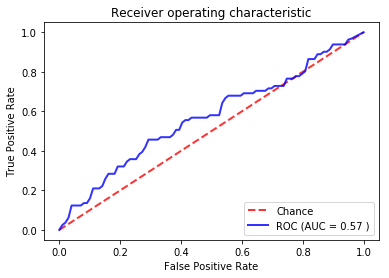

In [56]:

classifier = neighbors.KNeighborsClassifier(n_neighbors=9, weights='distance' ,n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col],
                         X_train[['MA_C']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_C']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_C']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('kNN with k=', 9)
print ('The accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 'Moderate' Model
Tuning for the best parameters 

In [22]:
AUC=pd.DataFrame({'k': [], 'AUC':[]})

for k in range(1,32,2):
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance' ,n_jobs=-1)
        aucs=[]
        for train, test in cv.split(X_train[col], X_train[['MA_M']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_M']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute area the curve
            roc_auc = roc_auc_score(X_train[['MA_M']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'k': [k], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

      k       AUC
8  17.0  0.548884


Evaluating the model

kNN with k= 17
The average accuracy: 0.5238095238095238
The ROC curve: 


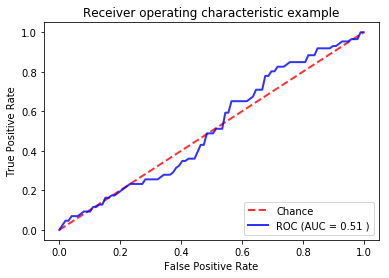

In [55]:

classifier = neighbors.KNeighborsClassifier(n_neighbors=17, weights='distance' ,n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_M']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_M']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_M']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('kNN with k=', 17)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Expensive' Model
Tuning for the best parameters 

In [25]:
AUC=pd.DataFrame({'k': [], 'AUC':[]})

for k in range(1,32,2):
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = neighbors.KNeighborsClassifier(n_neighbors=k, weights= 'distance' ,n_jobs=-1)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_E']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_E']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute area the curve
            roc_auc = roc_auc_score(X_train[['MA_E']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'k': [k], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

       k       AUC
10  21.0  0.646198


Evaluating the model

kNN with k= 21
The average accuracy: 0.5595238095238095
The ROC curve: 


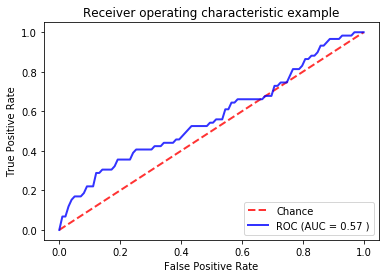

In [54]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=21, weights='distance' ,n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(
    X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('kNN with k=',21)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Very Expensive' Model
Tuning for the best parameters 

In [32]:
AUC=pd.DataFrame({'k': [], 'AUC':[]})

for k in range(1,32,2):
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance' ,n_jobs=-1)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_VE']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_VE']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute area the curve
            roc_auc = roc_auc_score(X_train[['MA_VE']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'k': [k], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

      k       AUC
6  13.0  0.609063


Evaluating the model

kNN with k= 23
The average accuracy: 0.75
The ROC curve: 


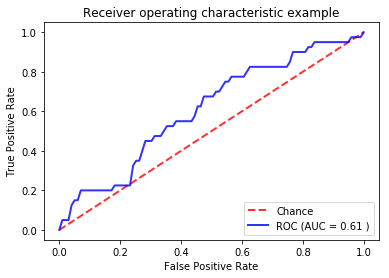

In [53]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=13, weights='distance' ,n_jobs=-1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_VE']].values.ravel()).predict_proba(
    X_test[col])
score=classifier.score(X_test[col],X_test[['MA_VE']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_VE']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('kNN with k=', 23)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## SVM Classification:

In [162]:
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = SVC(gamma='auto', probability=True, cache_size=1200, random_state=25)

    probas_ = classifier.fit(X_train[col],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[col])
    score=classifier.score(X_test[col],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[col])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 60.11904761904761
The AUC:  65.62366964665816
'Moderate' model:
The accuracy: 55.35714285714286
The AUC:  54.02013613159388
'Expensive' model:
The accuracy: 66.66666666666666
The AUC:  65.57300575338206
'Very Expensive' model:
The accuracy: 73.80952380952381
The AUC:  62.109375


With feature selection:

In [251]:
clss=['C','M','E','VE']
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = SVC(gamma='auto', probability=True, cache_size=1200, random_state=25)

    probas_ = classifier.fit(X_train[fslc_targ[clss[i]]],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[fslc_targ[clss[i]]])
    score=classifier.score(X_test[fslc_targ[clss[i]]],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[fslc_targ[clss[i]]])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 55.952380952380956
The AUC:  64.75095785440612
'Moderate' model:
The accuracy: 47.023809523809526
The AUC:  47.71695972773681
'Expensive' model:
The accuracy: 63.095238095238095
The AUC:  65.00544238843105
'Very Expensive' model:
The accuracy: 75.59523809523809
The AUC:  51.03515625


### 'Cheap' Model
Tuning for the best parameters 

In [34]:
AUC=pd.DataFrame({'C':[], 'gamma': [], 'AUC':[]})
for c in [0.1, 0.5, 1, 2, 5,
10, 20, 50]:
    for sigma in [0.01, 0.05, 0.1, 0.5, 1, 2, 5,
10]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = SVC(C=c ,kernel='rbf', gamma=sigma, probability=True, cache_size=1200,
                     random_state=25)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_C']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_C']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
             # Compute area the curve
            roc_auc = roc_auc_score(X_train[['MA_C']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'C':[c], 'gamma': [sigma], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

      C  gamma       AUC
24  2.0   0.01  0.635463


Evaluating the model

SVR with C= 5  , and gamma= 0.01
The average accuracy: 0.6309523809523809
The ROC curve: 


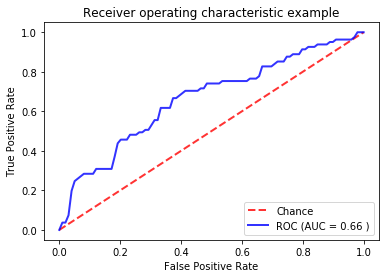

In [52]:
classifier = SVC(C=2 ,kernel='rbf', gamma=0.01, probability=True, cache_size=1200,
             random_state=25)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_C']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_C']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_C']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('SVR with C=', 5, ' , and gamma=', 0.01)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Moderate' Model
Tuning for the best parameters 

In [36]:
AUC=pd.DataFrame({'C':[], 'gamma': [], 'AUC':[]})
for c in [0.1, 0.5, 1, 2, 5,
10, 20, 50]:
    for sigma in [0.01, 0.05, 0.1, 0.5, 1, 2, 5,
10]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = SVC(C=c ,kernel='rbf', gamma=sigma, probability=True, cache_size=1200,
                     random_state=25)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_M']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_M']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_M']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'C':[c], 'gamma': [sigma], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

      C  gamma       AUC
24  2.0   0.01  0.563533


Evaluating the model

SVR with C= 2  , and gamma= 0.01
The average accuracy: 0.5238095238095238
The ROC curve: 


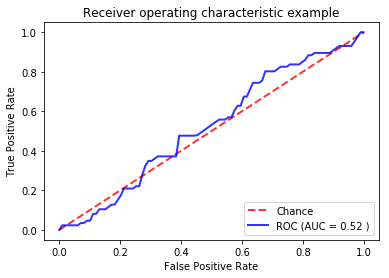

In [51]:

classifier = SVC(C=2 ,kernel='rbf', gamma=0.01, probability=True, cache_size=1200,
             random_state=25)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_M']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_M']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_M']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('SVR with C=', 2, ' , and gamma=', 0.01)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Expensive' Model
Tuning for the best parameters 

In [38]:
AUC=pd.DataFrame({'C':[], 'gamma': [], 'AUC':[]})
for c in [0.1, 0.5, 1, 2, 5,
10, 20, 50]:
    for sigma in [0.01, 0.05, 0.1, 0.5, 1, 2, 5,
10]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = SVC(C=c ,kernel='rbf', gamma=sigma, probability=True, cache_size=1200,
                     random_state=25)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_E']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_E']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC curve and area the curve
            roc_auc = roc_auc_score(X_train[['MA_E']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'C':[c], 'gamma': [sigma], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

     C  gamma      AUC
8  0.5   0.01  0.66847


Evaluating the model

SVR with C= 0.5  , and gamma= 0.01
The average accuracy: 0.6547619047619048
The ROC curve: 


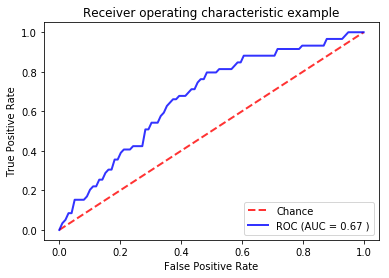

In [50]:

classifier = SVC(C=0.5 ,kernel='rbf', gamma=0.01, probability=True, cache_size=1200,
             random_state=25)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('SVR with C=', 0.5, ' , and gamma=', 0.01)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Very Expensive' Model
Tuning for the best parameters 

In [43]:
AUC=pd.DataFrame({'C':[], 'gamma': [], 'AUC':[]})
for c in [0.1, 0.5, 1, 2, 5,
10, 20, 50]:
    for sigma in [0.01, 0.05, 0.1, 0.5, 1, 2, 5,
10]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = SVC(C=c ,kernel='rbf', gamma=sigma, probability=True, cache_size=1200,
                     random_state=25)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_VE']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_VE']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_VE']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc= np.mean(aucs)
        current_AUC=pd.DataFrame({'C':[c], 'gamma': [sigma], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

     C  gamma       AUC
0  0.1   0.01  0.644447


Evaluating the model

SVR with C= 0.1  , and gamma= 0.01
The average accuracy: 0.7619047619047619
The ROC curve: 


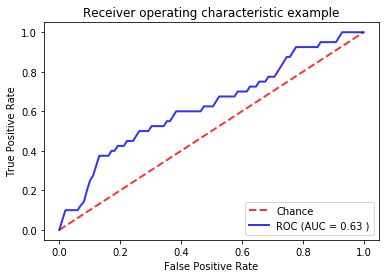

In [49]:

classifier = SVC(C=0.1 ,kernel='rbf', gamma=0.01, probability=True, cache_size=1200,
             random_state=25)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_VE']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_VE']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_VE']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('SVR with C=', 0.1, ' , and gamma=', 0.01)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classification:

In [163]:
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = RandomForestClassifier(n_estimators= 10 , n_jobs=-1, random_state =25)

    probas_ = classifier.fit(X_train[col],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[col])
    score=classifier.score(X_test[col],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[col])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 53.57142857142857
The AUC:  60.500922378317014
'Moderate' model:
The accuracy: 49.404761904761905
The AUC:  47.433352240499154
'Expensive' model:
The accuracy: 62.5
The AUC:  63.82366661483439
'Very Expensive' model:
The accuracy: 70.83333333333334
The AUC:  46.57226562499999


With feature selection:

In [247]:
clss=['C','M','E','VE']
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = RandomForestClassifier(n_estimators= 10 , n_jobs=-1, random_state =25)

    probas_ = classifier.fit(X_train[fslc_targ[clss[i]]],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[fslc_targ[clss[i]]])
    score=classifier.score(X_test[fslc_targ[clss[i]]],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[fslc_targ[clss[i]]])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 54.166666666666664
The AUC:  61.80644245778345
'Moderate' model:
The accuracy: 50.595238095238095
The AUC:  52.665910380034035
'Expensive' model:
The accuracy: 65.47619047619048
The AUC:  63.668169802519046
'Very Expensive' model:
The accuracy: 72.61904761904762
The AUC:  62.6953125


### 'Cheap' Model
Tuning for the best parameters 

In [57]:
AUC=pd.DataFrame({'max_depth':[], 'class_weight': [], 'AUC':[]})
for max_d in [10, 15, 20, 30, 50,
None]:
    for class_w in [None, 'balanced', 'balanced_subsample']:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = RandomForestClassifier(n_estimators=10, max_depth=max_d , n_jobs=-1
                                            , random_state =25, class_weight=class_w)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_C']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_C']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_C']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'max_depth':[max_d], 'class_weight': [class_w], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

   max_depth        class_weight       AUC
2       10.0  balanced_subsample  0.594389


Evaluating the model

RandomForestClassifier with max_depth 15  , class_weight= balanced
The average accuracy: 0.5654761904761905
The ROC curve: 


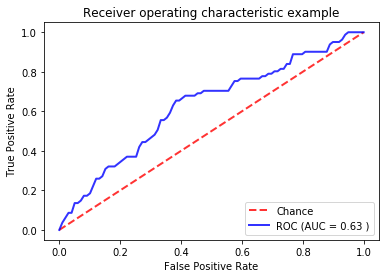

In [60]:

classifier = RandomForestClassifier(n_estimators=100, max_depth=10 , n_jobs=-1,
                                    random_state =25, class_weight='balanced_subsample')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_C']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_C']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_C']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('RandomForestClassifier with max_depth', 15, ' , class_weight=', 'balanced')
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Moderate' Model
Tuning for the best parameters 

In [58]:
AUC=pd.DataFrame({'max_depth':[], 'class_weight': [], 'AUC':[]})
for max_d in [10, 15, 20, 30, 50,
None]:
    for class_w in [None, 'balanced', 'balanced_subsample']:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = RandomForestClassifier(n_estimators=10, max_depth=max_d , n_jobs=-1,
                                            random_state =25, class_weight=class_w)
        aucs=[]
        for train, test in cv.split(X_train[col], X_train[['MA_M']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_M']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_M']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'max_depth':[max_d], 'class_weight': [class_w], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

   max_depth class_weight       AUC
6       20.0         None  0.531252


Evaluating the model

RandomForestClassifier with max_depth 15  , class_weight= None
The average accuracy: 0.6011904761904762
The ROC curve: 


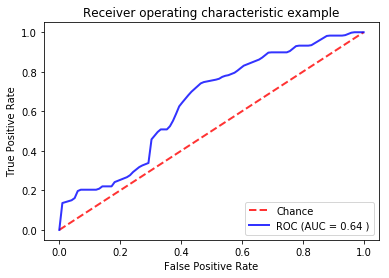

In [62]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20 , n_jobs=-1,
                                    random_state =25, class_weight=None)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('RandomForestClassifier with max_depth', 15, ' , class_weight=', None)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Expensive' Model
Tuning for the best parameters 

In [63]:
AUC=pd.DataFrame({'max_depth':[], 'class_weight': [], 'AUC':[]})
for max_d in [10, 15, 20, 30, 50,
None]:
    for class_w in [None, 'balanced', 'balanced_subsample']:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = RandomForestClassifier(n_estimators=10, max_depth=max_d , n_jobs=-1,
                                            random_state =25, class_weight=class_w)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_E']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_E']].iloc[train].values.ravel()).predict_proba(X_train[col].iloc[test])
            score=classifier.score(X_train[col].iloc[test],X_train[['MA_E']].iloc[test])
            scores.append(score)
            # Compute ROC curve and area the curve
            roc_auc = roc_auc_score(X_train[['MA_E']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'max_depth':[max_d], 'class_weight': [class_w], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

   max_depth        class_weight       AUC
2       10.0  balanced_subsample  0.637745


Evaluating the model

RandomForestClassifier with max_depth 10  , class_weight= balanced
The average accuracy: 0.6369047619047619
The ROC curve: 


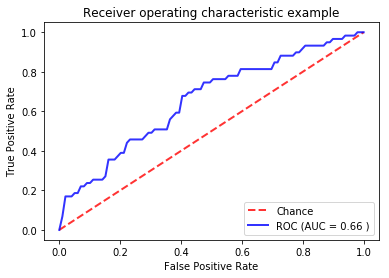

In [66]:

classifier = RandomForestClassifier(n_estimators=100, max_depth=10 , n_jobs=-1,
                                    random_state =25, class_weight='balanced_subsample')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('RandomForestClassifier with max_depth', 10, ' , class_weight=', 'balanced')
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Very Expensive' Model
Tuning for the best parameters 

In [64]:
AUC=pd.DataFrame({'max_depth':[], 'class_weight': [], 'AUC':[]})
for max_d in [10, 15, 20, 30, 50,
None]:
    for class_w in [None, 'balanced', 'balanced_subsample']:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier = RandomForestClassifier(n_estimators=10, max_depth=max_d , n_jobs=-1,
                                            random_state =25, class_weight=class_w)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_VE']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_VE']].iloc[train].values.ravel()).predict_proba(X_train[col].iloc[test])
            # Compute ROC curve and area the curve
            roc_auc = roc_auc_score(X_train[['MA_VE']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'max_depth':[max_d], 'class_weight': [class_w], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

   max_depth class_weight       AUC
7       20.0     balanced  0.616548


Evaluating the model

RandomForestClassifier with max_depth 10  , class_weight= None
The average accuracy: 0.7559523809523809
The ROC curve: 


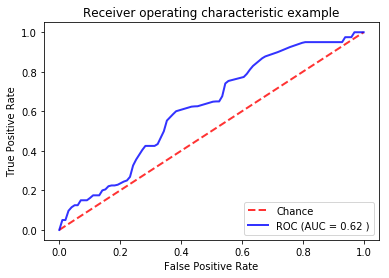

In [68]:

classifier = RandomForestClassifier(n_estimators=100, max_depth=20 , n_jobs=-1,
                                    random_state =25, class_weight='balanced')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_VE']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_VE']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_VE']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('RandomForestClassifier with max_depth', 10, ' , class_weight=', None)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Neural Network Classification:

In [241]:
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = MLPClassifier( random_state=25,max_iter=5000)

    probas_ = classifier.fit(X_train[col],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[col])
    score=classifier.score(X_test[col],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[col])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 55.35714285714286
The AUC:  60.53639846743295
'Moderate' model:
The accuracy: 54.166666666666664
The AUC:  54.15484968803177
'Expensive' model:
The accuracy: 56.547619047619044
The AUC:  61.56118799564608
'Very Expensive' model:
The accuracy: 67.26190476190477
The AUC:  62.53906250000001


With feature selection:

In [244]:
clss=['C','M','E','VE']
cls=['MA_C','MA_M','MA_E','MA_VE']
lbl=["'Cheap' model:","'Moderate' model:","'Expensive' model:","'Very Expensive' model:"]
for i in range(4):

    classifier = MLPClassifier( random_state=25,max_iter=5000)

    probas_ = classifier.fit(X_train[fslc_targ[clss[i]]],
                             X_train[[cls[i]]].values.ravel()).predict_proba(X_test[fslc_targ[clss[i]]])
    score=classifier.score(X_test[fslc_targ[clss[i]]],X_test[[cls[i]]])
    fpr, tpr, thresholds = roc_curve(X_test[[cls[i]]], probas_[:, 1])
    predictions = classifier.predict(X_test[fslc_targ[clss[i]]])
    print (lbl[i])
    print ('The accuracy:',score*100)
    print('The AUC: ', auc(fpr, tpr)*100)

'Cheap' model:
The accuracy: 57.14285714285714
The AUC:  59.04640272456364
'Moderate' model:
The accuracy: 48.214285714285715
The AUC:  48.45433919455474
'Expensive' model:
The accuracy: 58.333333333333336
The AUC:  60.67485616544861
'Very Expensive' model:
The accuracy: 61.904761904761905
The AUC:  55.25390624999999


### 'Cheap' Model
Tuning for the best parameters 

In [69]:
AUC=pd.DataFrame({'alpha':[], 'max_iter': [], 'AUC':[]})
for alph in [0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01,
0.05]:
    for max_it in [50,100,200,250]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=alph, max_iter =max_it ,
                                  random_state=25, early_stopping=True)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_C']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_C']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_C']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'alpha':[alph], 'max_iter': [max_it], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

    alpha  max_iter       AUC
24   0.05      50.0  0.603688


Evaluating the model

Neural Network with L2 penalty= 0.01 and max_iter= 50
The average accuracy: 0.625
The ROC curve: 


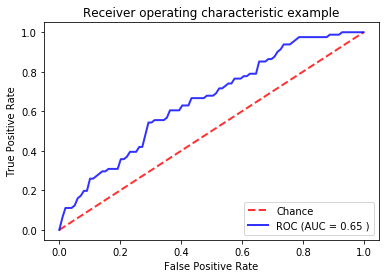

In [80]:

classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=0.05, max_iter =50 , random_state=25, early_stopping=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_C']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_C']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_C']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('Neural Network with L2 penalty=', 0.01, 'and max_iter=', 50)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Moderate' Model
Tuning for the best parameters 

In [75]:
AUC=pd.DataFrame({'alpha':[], 'max_iter': [], 'AUC':[]})
for alph in [0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01,
0.05]:
    for max_it in [50,100,200,250]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=alph, max_iter =max_it ,
                                  random_state=25, early_stopping=True)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_M']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_M']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC curve and area the curve
            roc_auc = roc_auc_score(X_train[['MA_M']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'alpha':[alph], 'max_iter': [max_it], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

    alpha  max_iter       AUC
24   0.05      50.0  0.571854


Evaluating the model

Neural Network with L2 penalty= 0.0001 and max_iter= 50
The average accuracy: 0.5892857142857143
The ROC curve: 


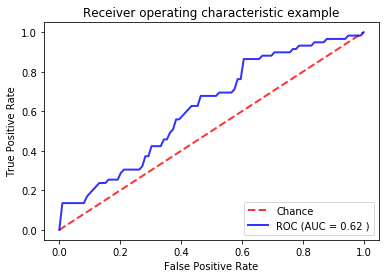

In [87]:
classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=0.05, max_iter =50 , 
                          random_state=25, early_stopping=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('Neural Network with L2 penalty=', 0.0001, 'and max_iter=', 50)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Expensive' Model
Tuning for the best parameters 

In [76]:
AUC=pd.DataFrame({'alpha':[], 'max_iter': [], 'AUC':[]})
for alph in [0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01,
0.05]:
    for max_it in [50,100,200,250]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=alph, max_iter =max_it ,
                                  random_state=25, early_stopping=True)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_E']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_E']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_E']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'alpha':[alph], 'max_iter': [max_it], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

    alpha  max_iter       AUC
0  0.0001      50.0  0.675028


Evaluating the model

Neural Network with L2 penalty= [[0.0001]] and max_iter= [[50.]]
The average accuracy: 0.5892857142857143
The ROC curve: 


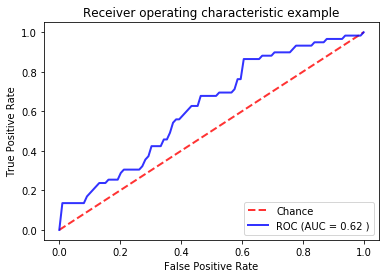

In [86]:
classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=0.0001, max_iter =50,
                          random_state=25, early_stopping=True)




tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_E']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_E']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_E']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('Neural Network with L2 penalty=', AUC[['alpha']].iloc[AUC[['AUC']].idxmax()].values, 'and max_iter=', AUC[['max_iter']].iloc[AUC[['AUC']].idxmax()].values)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 'Very Expensive' Model
Tuning for the best parameters 

In [77]:
AUC=pd.DataFrame({'alpha':[], 'max_iter': [], 'AUC':[]})
for alph in [0.0001, 0.0002, 0.0005, 0.001, 0.005, 0.01,
0.05]:
    for max_it in [50,100,200,250]:
        
        
        cv = StratifiedKFold(n_splits=5)
        classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=alph, max_iter =max_it ,
                                  random_state=25, early_stopping=True)
        aucs = []
        for train, test in cv.split(X_train[col], X_train[['MA_VE']]):
            probas_ = classifier.fit(X_train[col].iloc[train], X_train[['MA_VE']].iloc[train].values.ravel()).predict_proba(
                X_train[col].iloc[test])
            # Compute ROC area the curve
            roc_auc = roc_auc_score(X_train[['MA_VE']].iloc[test], probas_[:, 1])
            aucs.append(roc_auc)
        mean_auc = np.mean(aucs)
        current_AUC=pd.DataFrame({'alpha':[alph], 'max_iter': [max_it], 'AUC':[mean_auc]})
        AUC=AUC.append(current_AUC,ignore_index = True)

print(AUC.iloc[AUC[['AUC']].idxmax()])        

    alpha  max_iter       AUC
0  0.0001      50.0  0.605531


Evaluating the model

Neural Network with L2 penalty= 0.05 and max_iter= 50
The average accuracy: 0.6904761904761905
The ROC curve: 


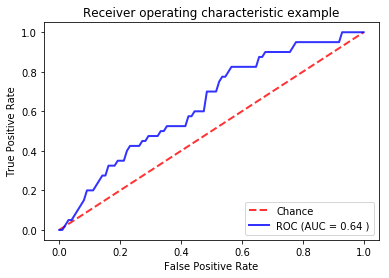

In [89]:
classifier =MLPClassifier(hidden_layer_sizes=5000, alpha=0.0001, max_iter =50 , random_state=25, early_stopping=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

scores=[]
probas_ = classifier.fit(X_train[col], X_train[['MA_VE']].values.ravel()).predict_proba(X_test[col])
score=classifier.score(X_test[col],X_test[['MA_VE']])
scores.append(score)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(X_test[['MA_VE']], probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
predictions = classifier.predict(X_test[col])
print ('Neural Network with L2 penalty=', 0.05, 'and max_iter=', 50)
print ('The average accuracy:',np.mean(scores))
print ('The ROC curve: ')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'ROC (AUC = %0.2f )' % (mean_auc),
         lw=2, alpha=.8)


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# References:
https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/svm.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html
http://bigdataexaminer.com/2016/03/01/k-nearest-neighbors-and-curse-of-dimensionality-in-python-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
http://bigdataexaminer.com/2016/03/31/how-to-run-linear-regression-in-python-scikit-learn/
https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
https://stackoverflow.com/questions/8528178/list-of-zeros-in-python
https://machinelearningmastery.com/feature-selection-machine-learning-python/
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba
http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html